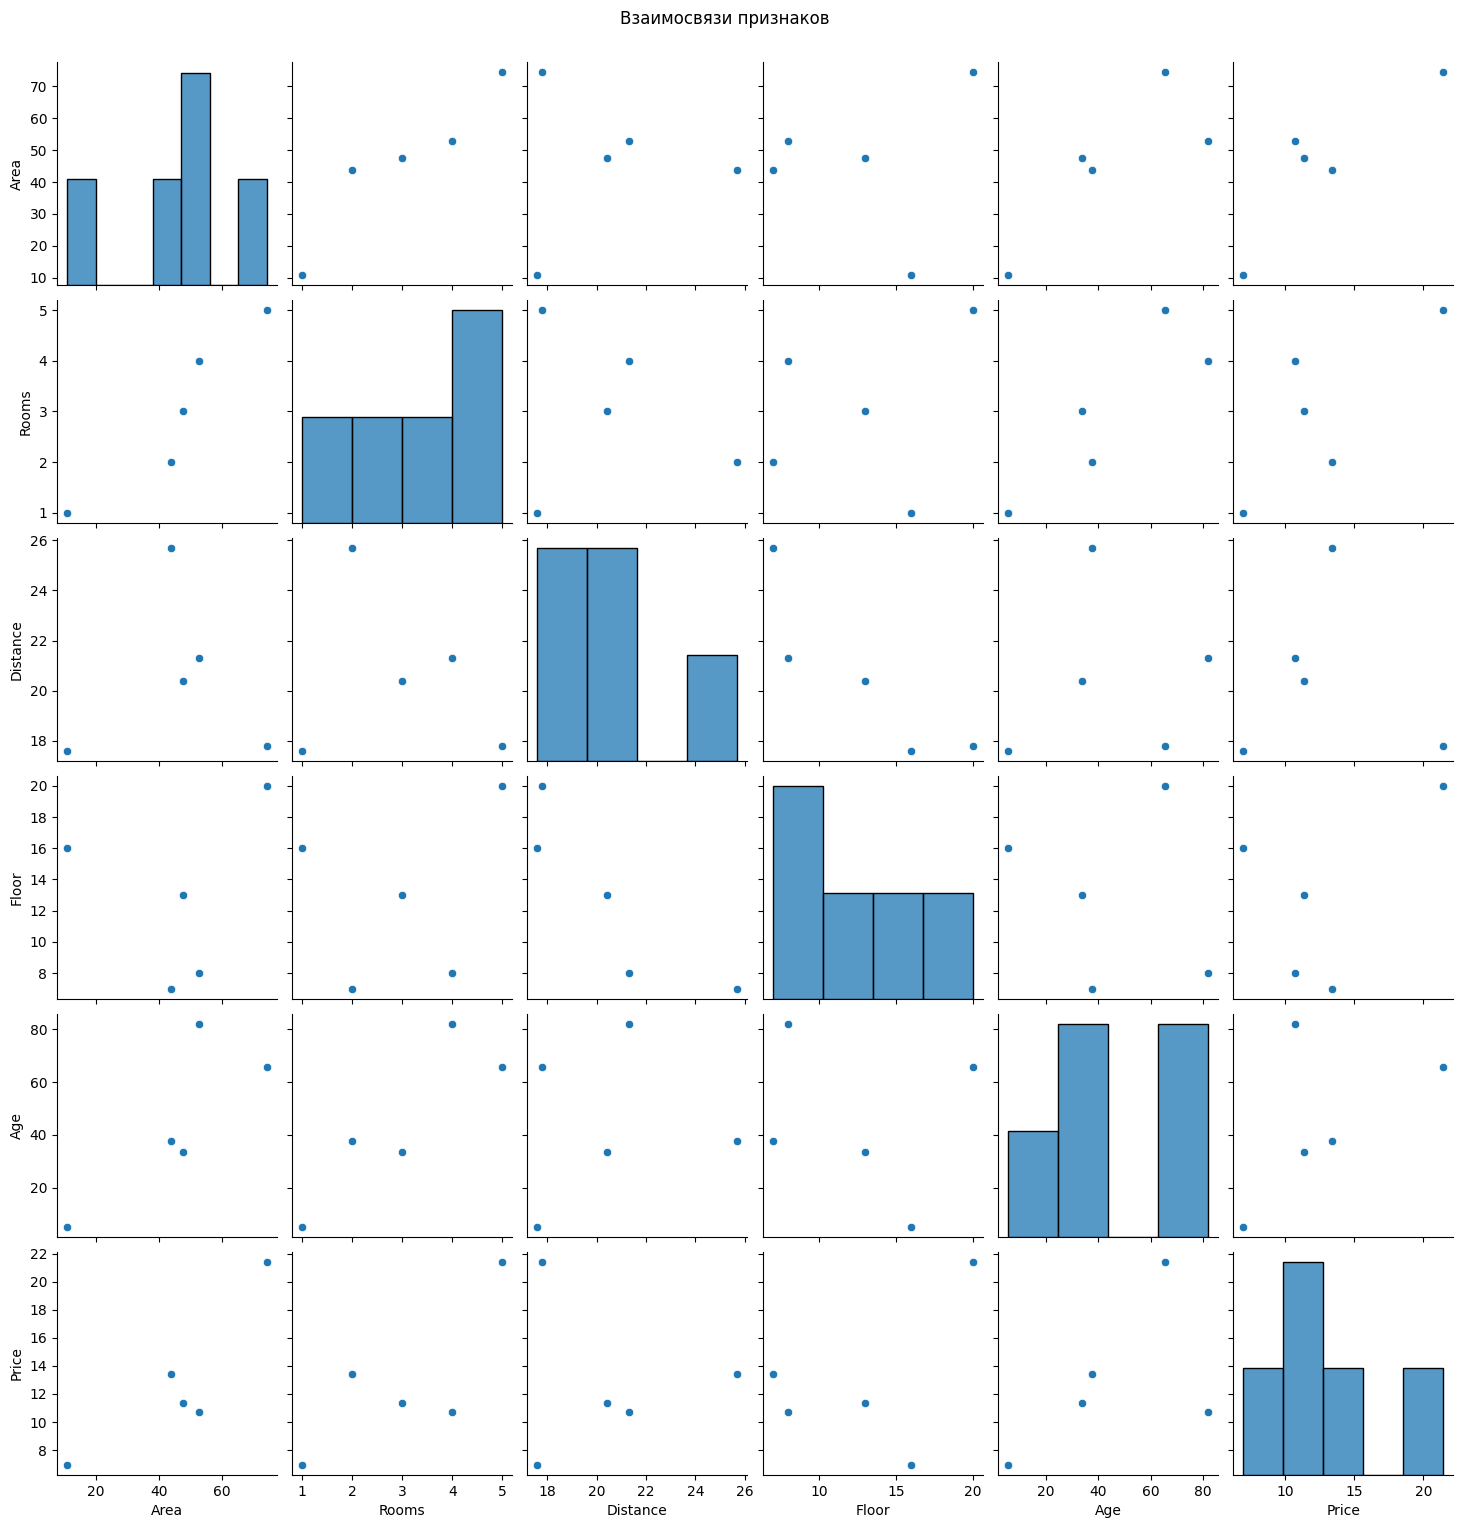

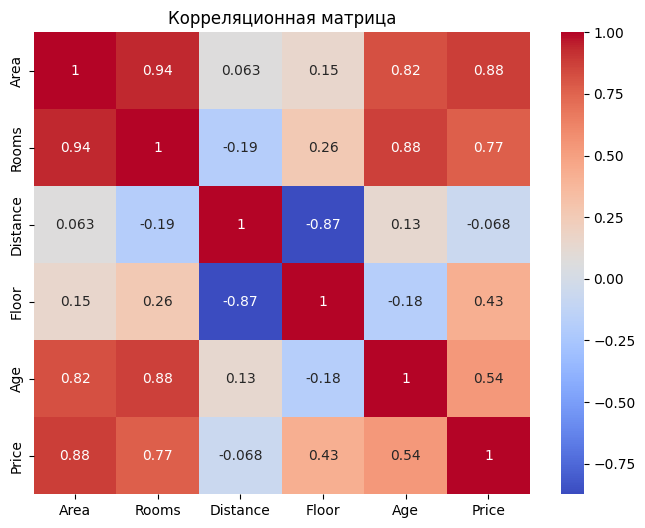

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 06 May 2025   Prob (F-statistic):                nan
Time:                        11:25:01   Log-Likelihood:                 146.18
No. Observations:                   5   AIC:                            -282.4
Df Residuals:                       0   BIC:                            -284.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.1655        inf         -0        n

/home/daniil/study/ml-course/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/daniil/study/ml-course/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/daniil/study/ml-course/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/daniil/study/ml-course/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


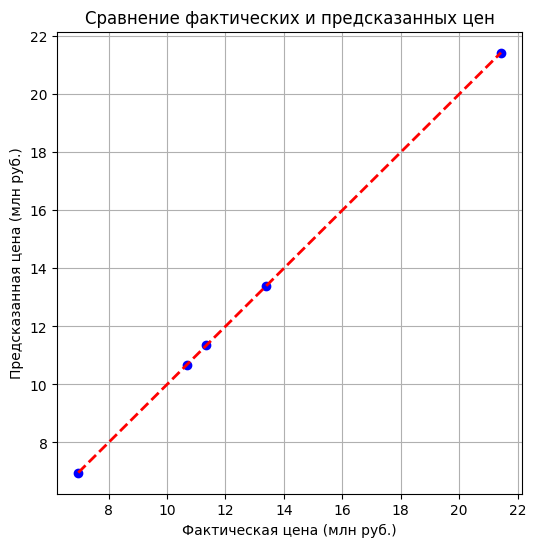

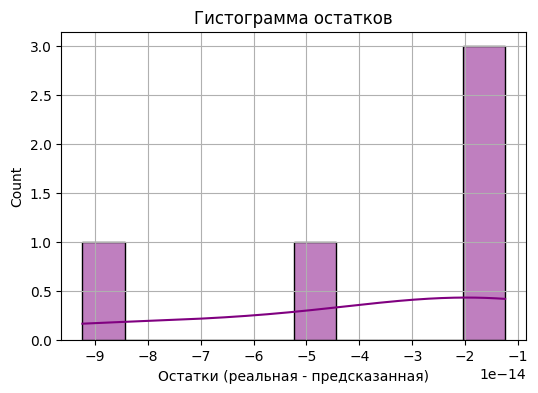

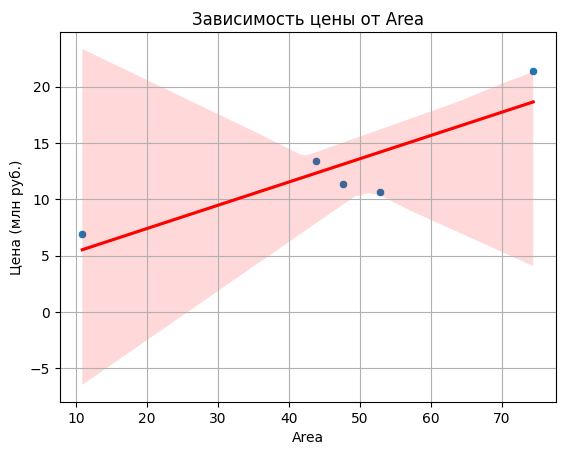

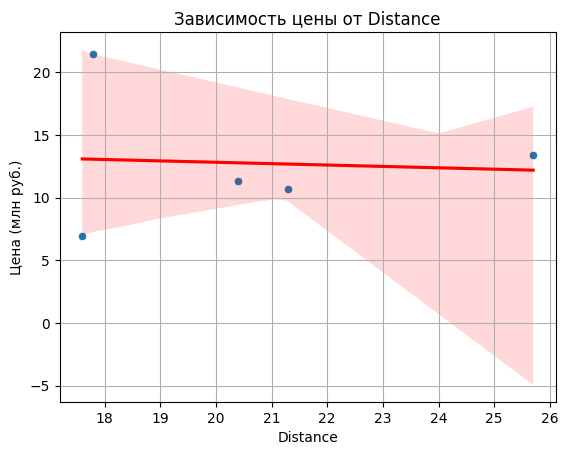

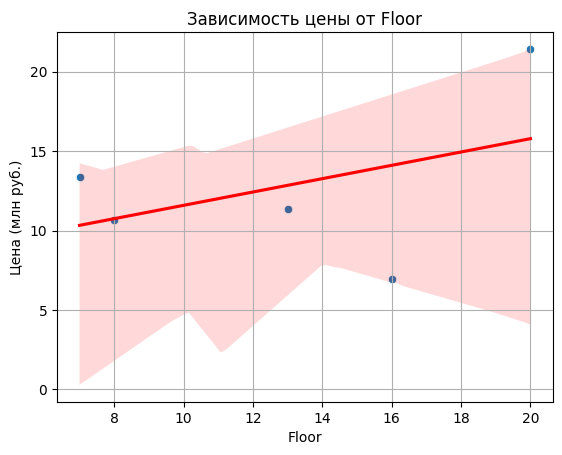

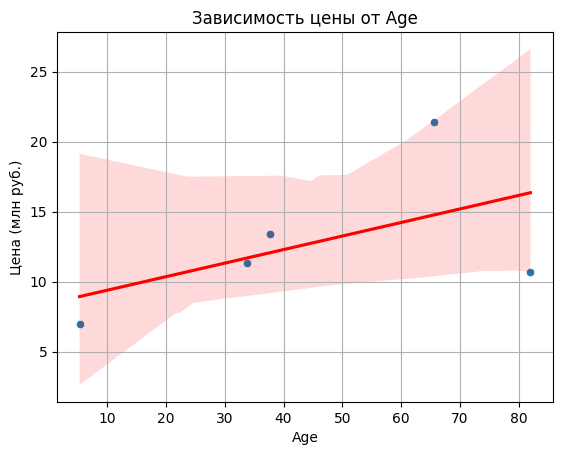

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Данные: пример из таблицы (5 наблюдений)
data = {
    'Area': [52.8, 74.4, 47.6, 10.9, 43.8],
    'Rooms': [4, 5, 3, 1, 2],
    'Distance': [21.3, 17.8, 20.4, 17.6, 25.7],
    'Floor': [8, 20, 13, 16, 7],
    'Age': [82.0, 65.6, 33.7, 5.3, 37.7],
    'Price': [10.68, 21.43, 11.34, 6.96, 13.40]
}

df = pd.DataFrame(data)

# === Визуальный анализ ===
sns.pairplot(df)
plt.suptitle("Взаимосвязи признаков", y=1.02)
plt.show()

# === Корреляционная матрица ===
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

# === Обучение модели (statsmodels для p-value) ===
X = df[['Area', 'Distance', 'Floor', 'Age']]
y = df['Price']
X = sm.add_constant(X)  # добавим константу для β₀

model = sm.OLS(y, X).fit()
print(model.summary())

# === Визуализация: реальные vs предсказанные значения ===
y_pred = model.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Фактическая цена (млн руб.)")
plt.ylabel("Предсказанная цена (млн руб.)")
plt.title("Сравнение фактических и предсказанных цен")
plt.grid()
plt.show()

# === Остатки ===
residuals = y - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=10, kde=True, color='purple')
plt.title("Гистограмма остатков")
plt.xlabel("Остатки (реальная - предсказанная)")
plt.grid()
plt.show()

# === Зависимость цены от каждого признака ===
features = ['Area', 'Distance', 'Floor', 'Age']
for feature in features:
    plt.figure()
    sns.scatterplot(x=df[feature], y=df['Price'])
    sns.regplot(x=df[feature], y=df['Price'], scatter=False, color='red')
    plt.title(f"Зависимость цены от {feature}")
    plt.xlabel(feature)
    plt.ylabel("Цена (млн руб.)")
    plt.grid()
    plt.show()
